In [1]:
# Step:1 analyse the past 3 years of dhoni's data
# Step:2 Visualization and compare between other finishers of IPL 2023 based on the set criteria
# Data is from Kaggle : IPL ball by ball updated : Link: 

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [3]:
df=pd.read_csv("IPL_ball_by_ball_updated.csv")

In [4]:
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.tail()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
243810,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,14.2,Chennai Super Kings,Gujarat Titans,S Dube,RA Jadeja,MM Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243811,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,14.3,Chennai Super Kings,Gujarat Titans,RA Jadeja,S Dube,MM Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243812,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,14.4,Chennai Super Kings,Gujarat Titans,S Dube,RA Jadeja,MM Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243813,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,14.5,Chennai Super Kings,Gujarat Titans,RA Jadeja,S Dube,MM Sharma,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243814,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,14.6,Chennai Super Kings,Gujarat Titans,RA Jadeja,S Dube,MM Sharma,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df[df['wides'].isnull()]
df.tail()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
243810,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,14.2,Chennai Super Kings,Gujarat Titans,S Dube,RA Jadeja,MM Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243811,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,14.3,Chennai Super Kings,Gujarat Titans,RA Jadeja,S Dube,MM Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243812,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,14.4,Chennai Super Kings,Gujarat Titans,S Dube,RA Jadeja,MM Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243813,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,14.5,Chennai Super Kings,Gujarat Titans,RA Jadeja,S Dube,MM Sharma,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243814,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,14.6,Chennai Super Kings,Gujarat Titans,RA Jadeja,S Dube,MM Sharma,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df = df[(df.season >= 2021) & (df.season <= 2023)]
df.tail()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
243810,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,14.2,Chennai Super Kings,Gujarat Titans,S Dube,RA Jadeja,MM Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243811,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,14.3,Chennai Super Kings,Gujarat Titans,RA Jadeja,S Dube,MM Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243812,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,14.4,Chennai Super Kings,Gujarat Titans,S Dube,RA Jadeja,MM Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243813,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,14.5,Chennai Super Kings,Gujarat Titans,RA Jadeja,S Dube,MM Sharma,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243814,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,14.6,Chennai Super Kings,Gujarat Titans,RA Jadeja,S Dube,MM Sharma,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
msdf = df[df['striker']== 'MS Dhoni']
msdf.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
193959,1254059,2021,2021-04-10,"Wankhede Stadium, Mumbai",1,15.2,Chennai Super Kings,Delhi Capitals,MS Dhoni,RA Jadeja,Avesh Khan,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193960,1254059,2021,2021-04-10,"Wankhede Stadium, Mumbai",1,15.3,Chennai Super Kings,Delhi Capitals,MS Dhoni,RA Jadeja,Avesh Khan,0,0,NaN,NaN,NaN,NaN,NaN,bowled,MS Dhoni,NaN,NaN
196389,1254069,2021,2021-04-19,"Wankhede Stadium, Mumbai",1,13.8,Chennai Super Kings,Rajasthan Royals,MS Dhoni,RA Jadeja,C Sakariya,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196391,1254069,2021,2021-04-19,"Wankhede Stadium, Mumbai",1,14.2,Chennai Super Kings,Rajasthan Royals,MS Dhoni,RA Jadeja,R Tewatia,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196392,1254069,2021,2021-04-19,"Wankhede Stadium, Mumbai",1,14.3,Chennai Super Kings,Rajasthan Royals,MS Dhoni,RA Jadeja,R Tewatia,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
len(msdf)

352

In [10]:
sum(msdf['runs_off_bat'])

450

In [11]:
sum(msdf['runs_off_bat']/len(msdf))*100

127.84090909090922

In [12]:
sum(df['player_dismissed'] == 'MS Dhoni')

18

In [13]:
df0= pd.DataFrame(df.groupby('striker')['runs_off_bat'].sum()).reset_index()

In [14]:
df1= pd.DataFrame(df.groupby('striker')['ball'].count()).reset_index()

In [15]:
df2= df0.merge(df1,on = 'striker', how='left')
df2= df2[df2.runs_off_bat >= 500]
df2= df2[df2.ball <= 500]
df2.head()

,striker,runs_off_bat,ball
7,AD Russell,745,468
13,AR Patel,505,369
33,B Sai Sudharsan,507,369
90,JM Bairstow,501,350
91,JM Sharma,543,341


In [16]:
len(df2)

14

In [17]:
df2['strike_rate']= df2['runs_off_bat']/df2['ball']*100

In [18]:
df2.reset_index(inplace=True, drop=True)
df2.head(14)

,striker,runs_off_bat,ball,strike_rate
0,AD Russell,745,468,159.188034
1,AR Patel,505,369,136.856369
2,B Sai Sudharsan,507,369,137.398374
3,JM Bairstow,501,350,143.142857
4,JM Sharma,543,341,159.237537
5,KD Karthik,693,454,152.643172
6,KH Pandya,514,433,118.706697
7,LS Livingstone,758,452,167.699115
8,MK Pandey,540,462,116.883117
9,MP Stoinis,653,450,145.111111


# let's visualize

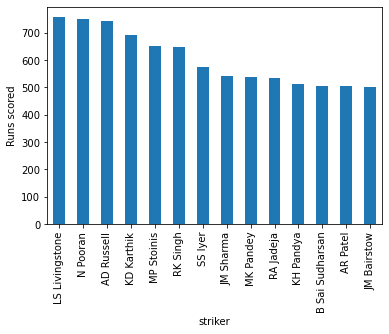

In [22]:
df2.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending = False).plot(kind ='bar')
plt.ylabel('Runs scored')
plt.show()


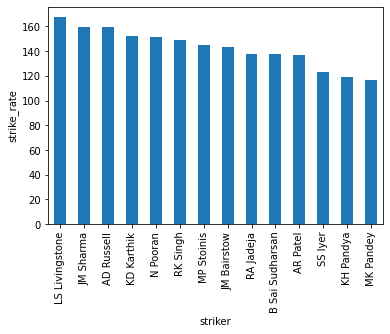

In [23]:
df2.groupby(['striker'])['strike_rate'].sum().sort_values(ascending = False).plot(kind ='bar')
plt.ylabel('strike_rate')
plt.show()


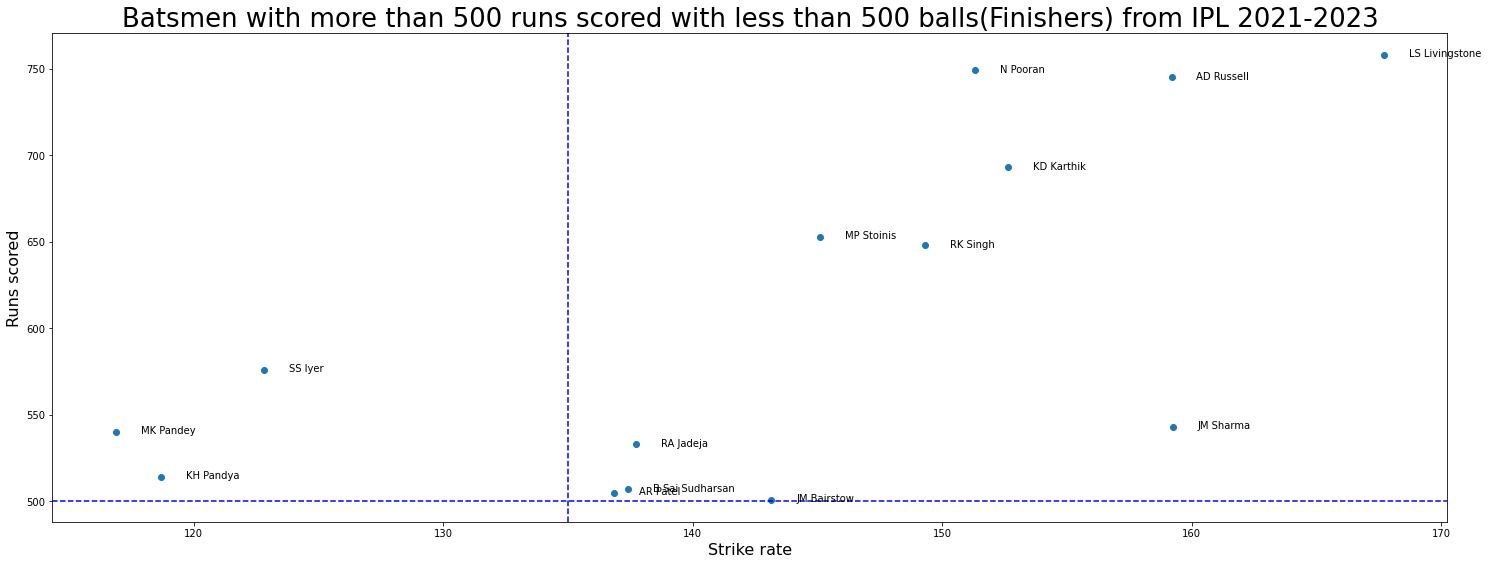

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,9))
plt.scatter(df2.strike_rate, df2.runs_off_bat)

for i in range(len(df2)):
     plt.text(df2['strike_rate'][i] + 1, df2['runs_off_bat'][i] - 1, df2['striker'][i] )
        
plt.title('Batsmen with more than 500 runs scored with less than 500 balls(Finishers) from IPL 2021-2023', fontsize=26 )
plt.xlabel('Strike rate', fontsize=16)
plt.ylabel('Runs scored', fontsize=16)
plt.axvline(135, ls='--', color='blue')
plt.axhline(500, ls='--', color='blue')
plt.show()

In [ ]:
# Report of the analysis

#1. The past 3 years of Dhoni's data (IPL 2021-2023) shows that Dhoni is nowhere near the competitive strike rate as the other finishers.
#2. He is not there in the top 14 of the criteria set in the model, ie score at least 500 runs in less than 500 balls.
#3. It summarises that  Dhoni is no more good enough to bat in IPL 2024.